In [93]:
import numpy as np
import random
import matplotlib.pyplot as plt
from functools import partial

In [94]:
NUM_PLAYERS = 11
NUM_MATCHES = 10000
EPSILON = 0.5

In [95]:
MATCH_CONDITIONS = ["Dry pitch", "Wet pitch", "Cloudy", "Sunny", "Windy", "Rainy", "Night"]

def get_player_performance(player, condition):
    performance = np.random.rand()
    condition_factors = {
        "Dry pitch": partial(lambda p: 0.1 * (p % 3), player),
        "Wet pitch": partial(lambda p: -0.1 * (p % 2), player),
        "Cloudy": partial(lambda p: 0.05 * (p % 4), player),
        "Sunny": partial(lambda p: 0.15 * (p % 5), player),
        "Windy": partial(lambda p: -0.1 * (p % 3), player),
        "Rainy": partial(lambda p: -0.2 * (p % 2), player),
        "Night": partial(lambda p: 0.05 * (p % 4), player)
    }
    performance += condition_factors[condition]()
    return max(0, performance)

## Algorithms

In [96]:
# Epsilon-Greedy Bandit Algorithm
def epsilon_greedy_bandit():
    rewards = np.zeros(NUM_PLAYERS)
    counts = np.zeros(NUM_PLAYERS)
    cumulative_rewards = np.zeros(NUM_MATCHES)
    total_reward = 0

    for match in range(NUM_MATCHES):
        condition = random.choice(MATCH_CONDITIONS)
        if np.random.rand() < EPSILON:
            player = np.random.choice(NUM_PLAYERS)
        else:
            player = np.argmax(rewards / (counts + 1e-5))
        reward = get_player_performance(player, condition)
        counts[player] += 1
        rewards[player] += reward
        total_reward += reward
        cumulative_rewards[match] = total_reward

    estimated_rates = rewards / (counts + 1e-5)
    return estimated_rates, counts, cumulative_rewards, rewards

# Upper Confidence Bound (UCB) Bandit Algorithm
def ucb_bandit():
    rewards = np.zeros(NUM_PLAYERS)
    counts = np.zeros(NUM_PLAYERS)
    total_count = 0
    cumulative_rewards = np.zeros(NUM_MATCHES)
    total_reward = 0

    for match in range(NUM_MATCHES):
        condition = random.choice(MATCH_CONDITIONS)
        if total_count < NUM_PLAYERS:
            player = total_count
        else:
            ucb_values = rewards / (counts + 1e-5) + np.sqrt(2 * np.log(total_count + 1) / (counts + 1e-5))
            player = np.argmax(ucb_values)
        reward = get_player_performance(player, condition)
        counts[player] += 1
        rewards[player] += reward
        total_reward += reward
        cumulative_rewards[match] = total_reward
        total_count += 1

    estimated_rates = rewards / (counts + 1e-5)
    return estimated_rates, counts, cumulative_rewards, rewards

# Random Selection Baseline
def random_selection_bandit():
    cumulative_rewards = np.zeros(NUM_MATCHES)
    rewards = np.zeros(NUM_PLAYERS)
    counts = np.zeros(NUM_PLAYERS)
    total_reward = 0

    for match in range(NUM_MATCHES):
        condition = random.choice(MATCH_CONDITIONS)
        player = np.random.choice(NUM_PLAYERS)
        reward = get_player_performance(player, condition)
        counts[player] += 1
        rewards[player] += reward
        total_reward += reward
        cumulative_rewards[match] = total_reward

    estimated_rates = rewards / (counts + 1e-5)
    return estimated_rates, counts, cumulative_rewards, rewards

In [97]:
estimated_rates_epsilon_greedy, selections_epsilon_greedy, cumulative_rewards_epsilon_greedy, rewards_epsilon_greedy = epsilon_greedy_bandit()
estimated_rates_ucb, selections_ucb, cumulative_rewards_ucb, rewards_ucb = ucb_bandit()
estimated_rates_random, selections_random, cumulative_rewards_random, rewards_random = random_selection_bandit()

avg_reward_epsilon_greedy = cumulative_rewards_epsilon_greedy / (np.arange(1, NUM_MATCHES + 1))
avg_reward_ucb = cumulative_rewards_ucb / (np.arange(1, NUM_MATCHES + 1))
avg_reward_random = cumulative_rewards_random / (np.arange(1, NUM_MATCHES + 1))


In [98]:
print("Epsilon-Greedy Estimated Conversion Rates:")
for i in range(NUM_PLAYERS):
    print(f"Player {i+1}: Average reward = {estimated_rates_epsilon_greedy[i]:.2f}, Selections = {selections_epsilon_greedy[i]}")

print("\nUCB Estimated Conversion Rates:")
for i in range(NUM_PLAYERS):
    print(f"Player {i+1}: Average reward = {estimated_rates_ucb[i]:.2f}, Selections = {selections_ucb[i]}")

print("\nRandom Selection Estimated Conversion Rates:")
for i in range(NUM_PLAYERS):
    print(f"Player {i+1}: Average reward = {estimated_rates_random[i]:.2f}, Selections = {selections_random[i]}")


Epsilon-Greedy Estimated Conversion Rates:
Player 1: Average reward = 0.50, Selections = 495.0
Player 2: Average reward = 0.52, Selections = 481.0
Player 3: Average reward = 0.58, Selections = 4074.0
Player 4: Average reward = 0.55, Selections = 463.0
Player 5: Average reward = 0.57, Selections = 480.0
Player 6: Average reward = 0.48, Selections = 450.0
Player 7: Average reward = 0.56, Selections = 437.0
Player 8: Average reward = 0.53, Selections = 556.0
Player 9: Average reward = 0.56, Selections = 505.0
Player 10: Average reward = 0.57, Selections = 1618.0
Player 11: Average reward = 0.56, Selections = 441.0

UCB Estimated Conversion Rates:
Player 1: Average reward = 0.51, Selections = 530.0
Player 2: Average reward = 0.51, Selections = 533.0
Player 3: Average reward = 0.57, Selections = 1250.0
Player 4: Average reward = 0.58, Selections = 1289.0
Player 5: Average reward = 0.57, Selections = 1111.0
Player 6: Average reward = 0.50, Selections = 504.0
Player 7: Average reward = 0.55, 

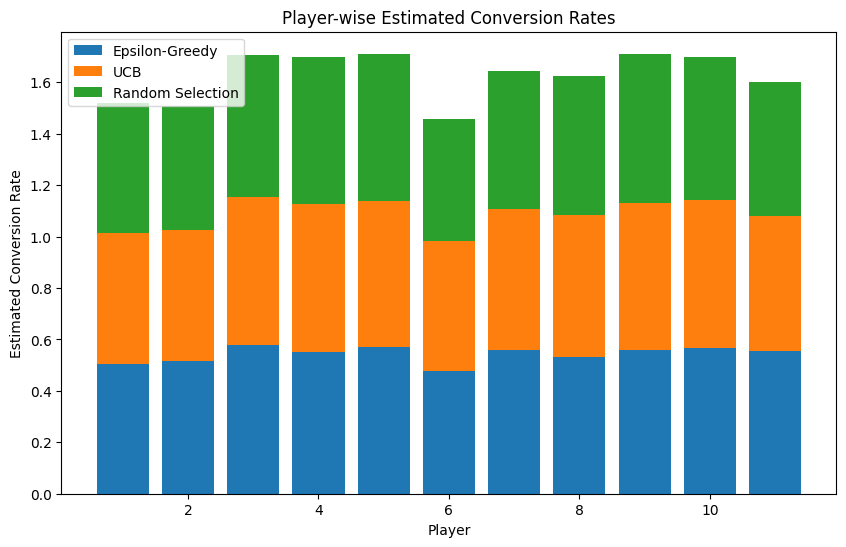

In [99]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, NUM_PLAYERS+1), estimated_rates_epsilon_greedy, label='Epsilon-Greedy')
plt.bar(range(1, NUM_PLAYERS+1), estimated_rates_ucb, bottom=estimated_rates_epsilon_greedy, label='UCB')
plt.bar(range(1, NUM_PLAYERS+1), estimated_rates_random, bottom=estimated_rates_epsilon_greedy+estimated_rates_ucb, label='Random Selection')
plt.xlabel('Player')
plt.ylabel('Estimated Conversion Rate')
plt.title('Player-wise Estimated Conversion Rates')
plt.legend()
plt.show()


In [100]:
print("\nAverage Rewards for Each Algorithm:")
print(f"Epsilon-Greedy Average Reward: {np.mean(avg_reward_epsilon_greedy):.4f}")
print(f"UCB Average Reward: {np.mean(avg_reward_ucb):.4f}")
print(f"Random Selection Average Reward: {np.mean(avg_reward_random):.4f}")

print("\nTotal Cumulative Rewards:")
print(f"Epsilon-Greedy: {sum(cumulative_rewards_epsilon_greedy):.2f}")
print(f"UCB: {sum(cumulative_rewards_ucb):.2f}")
print(f"Random Selection: {sum(cumulative_rewards_random):.2f}")



Average Rewards for Each Algorithm:
Epsilon-Greedy Average Reward: 0.5588
UCB Average Reward: 0.5494
Random Selection Average Reward: 0.5371

Total Cumulative Rewards:
Epsilon-Greedy: 27902889.93
UCB: 27635659.19
Random Selection: 26864542.30


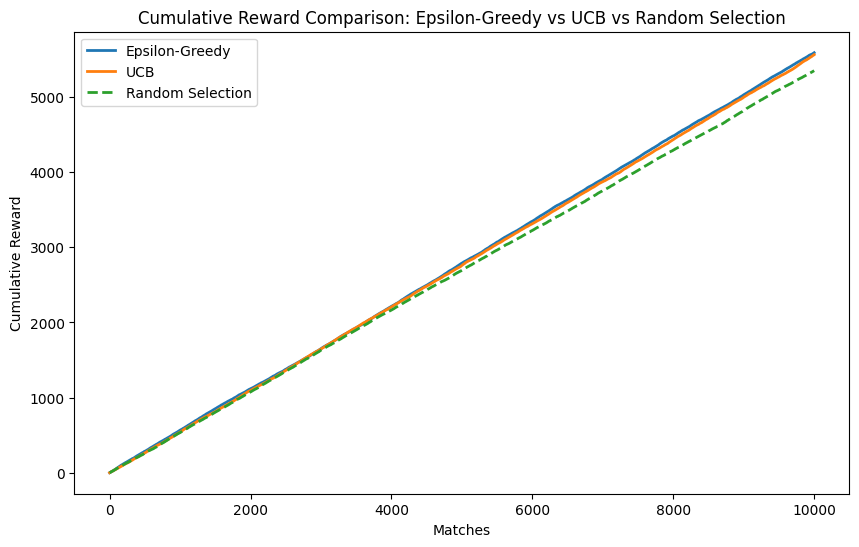

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards_epsilon_greedy, label='Epsilon-Greedy', linewidth=2)
plt.plot(cumulative_rewards_ucb, label='UCB', linewidth=2)
plt.plot(cumulative_rewards_random, label='Random Selection', linestyle='--', linewidth=2)
plt.xlabel('Matches')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward Comparison: Epsilon-Greedy vs UCB vs Random Selection')
plt.legend()
plt.show()